**Model Training for Random Forest**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('model_building_dataset.csv')
data.head()

,label,word_len_review,string_len_review,aaa,abc,ability,abit,able,abroad,absolute,...,young,younger,yr,yuck,yum,yummy,yunque,zero,zone,zoo
0,1,87,593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1,250,1689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,217,1427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,89,600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,191,1281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
model = SelectKBest(score_func=chi2, k='all')
fit = model.fit(data.iloc[:,1:], data.iloc[:,0])
scores = np.around(fit.scores_, 3)
scores

array([1.3501900e+04, 7.2635349e+04, 3.9200000e-01, ..., 9.1100000e-01,
       6.3900000e-01, 1.6400000e+00])

In [6]:
idx_cols = list(np.where(scores>0.5)[0])
idx_cols = [x+1 for x in idx_cols]
idx_cols[:5]

[1, 2, 6, 9, 10]

In [7]:
data.shape

(20491, 5003)

In [8]:
data = pd.concat([data.iloc[:,0],data.iloc[:,idx_cols]], axis=1)
data.head()

,label,word_len_review,string_len_review,abit,absolute,absolutely,absolutley,absolutly,abundant,ac,...,yellow,yoga,yoghurt,yogurt,york,yuck,yummy,zero,zone,zoo
0,1,87,593,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1,250,1689,0.0,0.0,0.0,0.0,0.0,0.0,0.062472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,217,1427,0.0,0.0,0.0,0.0,0.0,0.0,0.077393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,89,600,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,191,1281,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(20491, 3340)

# Model Building

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [11]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16392, 3339) (16392,) (4099, 3339) (4099,)


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=2)

kfold = KFold(n_splits=5)
result = cross_val_score(model, X_train, y_train, cv=kfold)
result.mean()

### Hyperparameter Tunning

In [14]:
params = {'n_estimators':[10,30,50,100], 'criterion':['entropy','gini'] ,'max_depth': [2,4,6,8,10,12], 
          'class_weight':['balanced', "balanced_subsample",None]}

model_test = RandomForestClassifier()
gcv = GridSearchCV(estimator=model_test,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 30, 50, 100]})

In [15]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8098464520184188
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'n_estimators': 100}


In [18]:
params = {'n_estimators':[90,100,120,150], 'criterion':['entropy','gini'] ,'max_depth': [11,12,14,16], 
          'class_weight':['balanced']}

model_test = RandomForestClassifier(n_jobs=2)
gcv = GridSearchCV(estimator=model_test,param_grid=params, n_jobs=4)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=2), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [11, 12, 14, 16],
                         'n_estimators': [90, 100, 120, 150]})

In [19]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8275381023061504
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 120}


In [20]:
params = {'n_estimators':[100,120,140,150], 'criterion':['entropy','gini'] ,'max_depth': [16,18,20,25], 
          'class_weight':['balanced']}

model_test = RandomForestClassifier(n_jobs=2)
gcv = GridSearchCV(estimator=model_test,param_grid=params, n_jobs=4)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=2), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [16, 18, 20, 25],
                         'n_estimators': [100, 120, 140, 150]})

In [21]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8327232610278473
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 150}


In [22]:
params = {'n_estimators':[140,150,170,200], 'criterion':['entropy','gini'] ,'max_depth': [23,25,27,30], 
          'class_weight':['balanced']}

model_test = RandomForestClassifier(n_jobs=2)
gcv = GridSearchCV(estimator=model_test,param_grid=params, n_jobs=4)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=2), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [23, 25, 27, 30],
                         'n_estimators': [140, 150, 170, 200]})

In [23]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8333945136102857
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 25, 'n_estimators': 170}


### Random Forest Model Building

In [38]:
model = RandomForestClassifier(n_estimators=170, criterion='gini', max_depth=25, class_weight='balanced', n_jobs=5)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, n_estimators=170,
                       n_jobs=5)

In [39]:
y_train_pred = model.predict(X_train)
print('Training Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

y_test_pred = model.predict(X_test)
print('\nTesting Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

Training Scores:-
Accuracy Score:  0.988
F1 Score:  0.988
Precision Score:  0.988
Recall Score:  0.988

Testing Scores:-
Accuracy Score:  0.831
F1 Score:  0.796
Precision Score:  0.794
Recall Score:  0.831


In [40]:
model = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=25, class_weight='balanced', n_jobs=5)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=25, n_estimators=150, n_jobs=5)

In [41]:
y_train_pred = model.predict(X_train)
print('Training Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

y_test_pred = model.predict(X_test)
print('\nTesting Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

Training Scores:-
Accuracy Score:  0.988
F1 Score:  0.988
Precision Score:  0.989
Recall Score:  0.988

Testing Scores:-
Accuracy Score:  0.83
F1 Score:  0.794
Precision Score:  0.797
Recall Score:  0.83


In [42]:
model = RandomForestClassifier(n_estimators=120, criterion='entropy', max_depth=16, class_weight='balanced', n_jobs=5)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=16, n_estimators=120, n_jobs=5)

In [43]:
y_train_pred = model.predict(X_train)
print('Training Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_train, y_train_pred),3))
print('F1 Score: ',round(f1_score(y_train, y_train_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_train, y_train_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_train, y_train_pred, average='weighted'),3))

y_test_pred = model.predict(X_test)
print('\nTesting Scores:-')
print('Accuracy Score: ',round(accuracy_score(y_test, y_test_pred),3))
print('F1 Score: ',round(f1_score(y_test, y_test_pred, average='weighted'),3))
print('Precision Score: ',round(precision_score(y_test, y_test_pred, average='weighted'),3))
print('Recall Score: ',round(recall_score(y_test, y_test_pred, average='weighted'),3))

Training Scores:-
Accuracy Score:  0.95
F1 Score:  0.951
Precision Score:  0.952
Recall Score:  0.95

Testing Scores:-
Accuracy Score:  0.82
F1 Score:  0.805
Precision Score:  0.799
Recall Score:  0.82


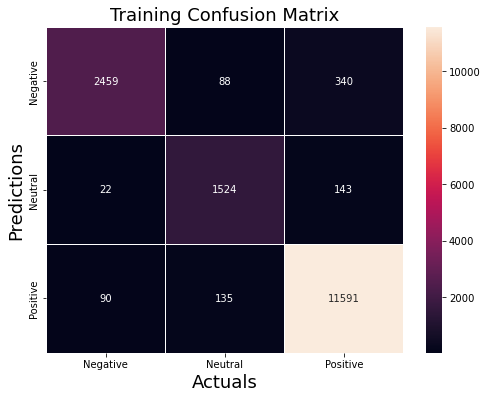

In [44]:
cm = confusion_matrix(y_train, y_train_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f', linewidths=1)
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Training Confusion Matrix', fontsize=18)
plt.show()

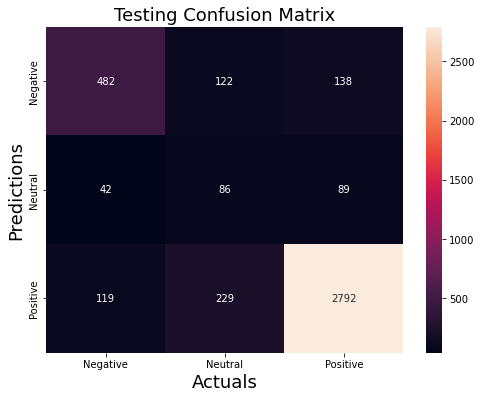

In [45]:
cm = confusion_matrix(y_test, y_test_pred)
dt = {'Negative':list(cm[0]), 'Neutral':list(cm[1]), 'Positive':list(cm[2])}
cm_df = pd.DataFrame(dt, index=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='.0f')
plt.ylabel('Predictions', fontsize=18)
plt.xlabel('Actuals', fontsize=18)
plt.title('Testing Confusion Matrix', fontsize=18)
plt.show()

## Conclusion 

+ Hyperparameter Values for Random Forest are:
    + n_estimators=120, 
    + criterion='entropy', 
    + max_depth=16, 
    + class_weight='balanced'

Because as we go for the best accurate Hyperparameter value, the gap between Training and Testing Accuracy is around 15-16% (i.e model is Overfitting) so we take above mention Hyperparameter values for Random Forest Model